## Study on liver diseases patient dataset using machine learning classification technique

Dataset link:  https://www.kaggle.com/uciml/indian-liver-patient-records
        
Objective:
        
        Uses different classification methods to see which model give the highest accuracy.
    
About Dataset:
    

    This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.


Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

Age of the patient

Gender of the patient

Total Bilirubin

Direct Bilirubin

Alkaline Phosphotase

Alamine Aminotransferase

Aspartate Aminotransferase

Total Protiens

Albumin

Albumin and Globulin Ratio

Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"F:\Priyanaka\Dataset\indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
## Check missing values
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
## We see that at Albumin_and_Globulin_Ratio has a missing values 
## we 1st imuputation

In [6]:
df["Albumin_and_Globulin_Ratio"].mean()

0.9470639032815201

In [7]:
df["Albumin_and_Globulin_Ratio"].fillna(value = df["Albumin_and_Globulin_Ratio"].mean(), inplace = True )

In [8]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [9]:
## there is no missing value

In [10]:
## check duplicate values
df.duplicated().value_counts()

False    570
True      13
dtype: int64

In [11]:
## drop duplicate coloum
df = df.drop_duplicates()
df.shape

(570, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  570 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


### Dummy variable creation

In [13]:
df = pd.get_dummies(df, columns= ["Gender"],drop_first = True)
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


<AxesSubplot:xlabel='Dataset', ylabel='count'>

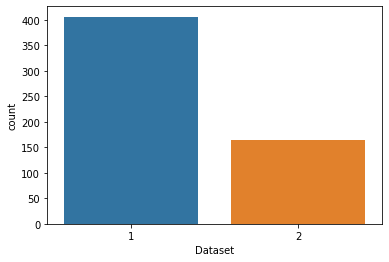

In [14]:
sns.countplot(x = 'Dataset' , data = df)

In [15]:
count_df=pd.value_counts(df['Dataset'],sort=True)
count_df

1    406
2    164
Name: Dataset, dtype: int64

In [16]:
## Our data is in imbalenced so we need to balance it
## 1st we choose x and y 

In [17]:
X = df.drop(['Gender_Male','Dataset'], axis=1)
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40


In [18]:
df_corr = X.corr()

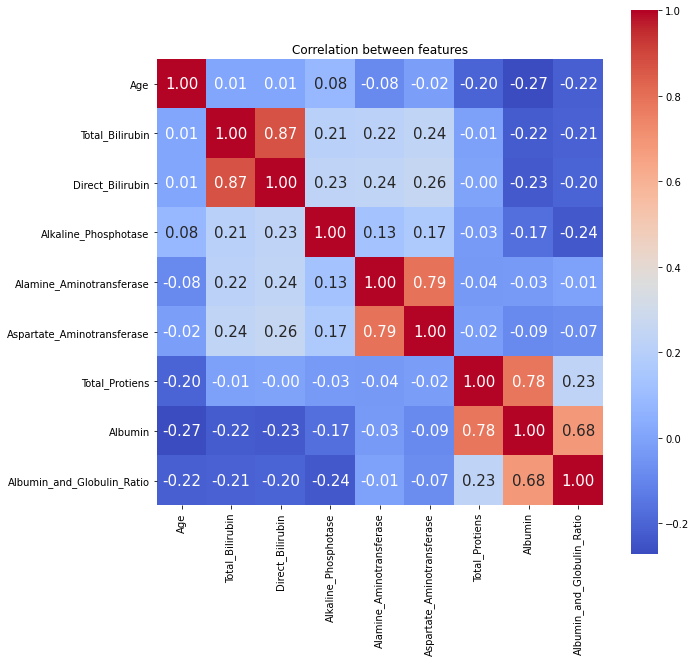

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.title('Correlation between features');


In [20]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [21]:
y = df['Dataset']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [23]:
## Handeling imbalenced dataset using over sampling method 

### over_sampling

In [24]:
from imblearn.over_sampling import RandomOverSampler
kmsm = RandomOverSampler(random_state=45) 
X_train_res,y_train_res =kmsm.fit_resample(X_train, y_train)

In [25]:
from collections import Counter
print('imbalanced  class distibustion  in traing data set : ',Counter(y_train))
print('balanced  class distibustion  in traing data set   : ',Counter(y_train_res))

imbalanced  class distibustion  in traing data set :  Counter({1: 286, 2: 113})
balanced  class distibustion  in traing data set   :  Counter({1: 286, 2: 286})


In [26]:
y_train_res.value_counts()

2    286
1    286
Name: Dataset, dtype: int64

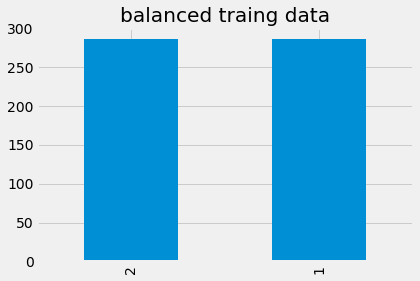

In [27]:
class_ditribution=y_train_res.value_counts()
plt.style.use('fivethirtyeight')
class_ditribution.plot(kind='bar')
plt.title('balanced traing data')
plt.show()

## Training The Model

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
model_1 =DecisionTreeClassifier()
model_1.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [29]:
y_pred_1 = model_1.predict(X_test)

### Model performance

In [30]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [31]:
confusion_matrix(y_test,y_pred_1)

array([[94, 26],
       [33, 18]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred_1)

0.6549707602339181

### Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_estimators=100)
model_2
model_2.fit(X_train_res,y_train_res)
y_pred_2=model_2.predict(X_test)

In [34]:
confusion_matrix(y_test,y_pred_2)

array([[86, 34],
       [27, 24]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred_2)

0.6432748538011696

### SVM

In [36]:
from sklearn.svm import SVC

In [37]:
model_3 = SVC(kernel='linear')
model_3.fit(X_train_res,y_train_res)
y_pred_3 = model_3.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred_3)

array([[49, 71],
       [ 6, 45]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred_2)

0.6432748538011696

### Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_res,y_train_res)

C:\Users\cool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred=classifier.predict(X_test)
y_pred
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.5847953216374269

### Final result


Decision Tree         65.49%
SVM                   64.32% 
Random forest         64.32%
LR                    58.47% 

The Decision Tree give highest accuracy